In [2]:
import pandas as pd

df = pd.read_csv('/content/creditcard.csv')

num_rows, num_cols = df.shape
print(f"Rows: {num_rows} credit card transactions")
print(f"Columns: {num_cols}")

fraud_count = df['Class'].sum()
fraud_percent = (fraud_count / num_rows) * 100
print(f"Frauds: {fraud_count} (~{fraud_percent:.2f}% of data)")

print("\nColumn Names:")
print(df.columns.tolist())

print("\nSample Data:")
print(df.head())


Rows: 103088 credit card transactions
Columns: 31
Frauds: 232.0 (~0.23% of data)

Column Names:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Sample Data:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import pandas as pd

df = pd.read_csv('creditcard.csv')
X = df.drop(columns=['Class', 'Time'])
X['Amount'] = StandardScaler().fit_transform(X[['Amount']])


In [4]:
model = IsolationForest(contamination=0.0017, random_state=42)
model.fit(X)


IsolationForest(contamination=0.0017, random_state=42)

In [5]:
df['anomaly_score'] = -model.score_samples(X)
df['IF_anomaly'] = model.predict(X)


In [6]:
df['IF_anomaly'] = df['IF_anomaly'].map({1: 0, -1: 1})  # 1 = anomaly


In [7]:
anomaly_count = df['IF_anomaly'].sum()
normal_count = len(df) - anomaly_count
print(f"Anomalies Detected: {anomaly_count}")
print(f"Normal Transactions: {normal_count}")


Anomalies Detected: 485
Normal Transactions: 284322


In [8]:

df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df['rule_high_amount'] = df['Amount'] > 3
df['rule_v14_extreme'] = df['V14'] < -9
df['rule_based_anomaly'] = (df['rule_high_amount'] | df['rule_v14_extreme']).astype(int)

# Summary
total_rules_flagged = df['rule_based_anomaly'].sum()
print(f"Rule-Based Anomalies Detected: {total_rules_flagged}")


Rule-Based Anomalies Detected: 4251


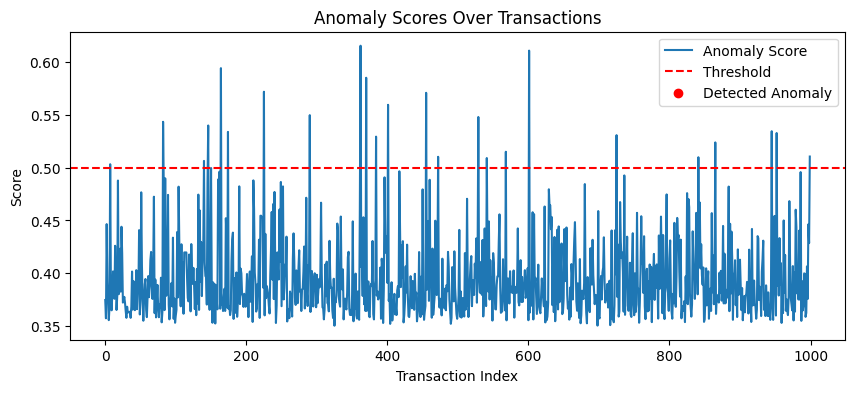

In [9]:
import matplotlib.pyplot as plt

sample = df.head(1000)

plt.figure(figsize=(10, 4))
plt.plot(sample.index, sample['anomaly_score'], label='Anomaly Score')
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold')
plt.scatter(sample.index[sample['IF_anomaly'] == 1],
            sample[sample['IF_anomaly'] == 1]['anomaly_score'],
            color='red', label='Detected Anomaly')
plt.legend()
plt.title("Anomaly Scores Over Transactions")
plt.xlabel("Transaction Index")
plt.ylabel("Score")
plt.show()
